# Data Analysis

### Import necessary libriries 

In [67]:
import pandas as pd
import seaborn as sns

### Merge bts table with medictions table
It's necessary to merge for test and train datasets. Also these datasets must be reduced to correctly join bts dataset

In [68]:
bts = pd.read_csv('./data/bts.csv')
meds = pd.read_csv('./data/meds_train.csv')

meds_train_melt = pd.melt(
    meds,
    id_vars=['ponto_id', 'delay_1', 'delay_2', 'delay_3', 'lat', 'lon', 'indoor'],
    value_vars=['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'],
    var_name='rssi_id',
    value_name='rssi_value'
)

# merge tables
merged_df = pd.merge(
    bts,
    meds_train_melt,
    left_on='RssiId',
    right_on='rssi_id',
)

# save to csv
merged_df.to_csv('./data/data_train.csv', index=False)

In [69]:
# same thing for test data
meds_test = pd.read_csv('./data/meds_test.csv')

meds_test_melt = pd.melt(
    meds_test,
    id_vars=['ponto_id', 'delay_1', 'delay_2', 'delay_3'],
    value_vars=['rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'],
    var_name='rssi_id',
    value_name='rssi_value'
)

# merge tables
merged_df_test = pd.merge(
    bts,
    meds_test_melt,
    left_on='RssiId',
    right_on='rssi_id',
)

# save to csv
merged_df_test.to_csv('./data/data_test.csv', index=False)

### Search for missing values

In [70]:
## missng data analysis
print('Missing data in train data:')
print(merged_df.isnull().sum())

Missing data in train data:
grupo         0
btsId         0
btsNetNome    0
lat_x         0
lon_x         0
cch           0
azimuth       0
RssiId        0
ponto_id      0
delay_1       0
delay_2       0
delay_3       0
lat_y         0
lon_y         0
indoor        0
rssi_id       0
rssi_value    0
dtype: int64


No missing values in train dataset

In [71]:
## missing data in test data
print('Missing data in test data:')
print(merged_df_test.isnull().sum())

Missing data in test data:
grupo         0
btsId         0
btsNetNome    0
lat           0
lon           0
cch           0
azimuth       0
RssiId        0
ponto_id      0
delay_1       0
delay_2       0
delay_3       0
rssi_id       0
rssi_value    0
dtype: int64


No missing data in test dataset

### Search for outliers

In [72]:
describe = merged_df.describe()
describe

,grupo,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,rssi_value
count,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000,60975.000000
mean,2.000000,-8.050543,-34.951524,873.000000,120.000000,4856.099779,4.679410,3.159262,2.504945,-8.054510,-34.951792,-99.936593
std,0.816503,0.005134,0.005411,4.346171,97.980393,2785.462945,0.911409,1.009861,1.095022,0.002388,0.002309,11.118527
min,1.000000,-8.055320,-34.957900,865.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850,-115.630000
25%,1.000000,-8.055320,-34.957900,871.000000,0.000000,2434.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728,-108.430000
50%,2.000000,-8.052890,-34.952000,873.000000,120.000000,4875.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597,-98.787500
75%,3.000000,-8.043420,-34.944672,875.000000,240.000000,7273.000000,5.000000,3.000000,3.000000,-8.055310,-34.951331,-92.912143
max,3.000000,-8.043420,-34.944672,881.000000,240.000000,9676.000000,8.000000,7.000000,7.000000,-8.046420,-34.945110,-36.960000


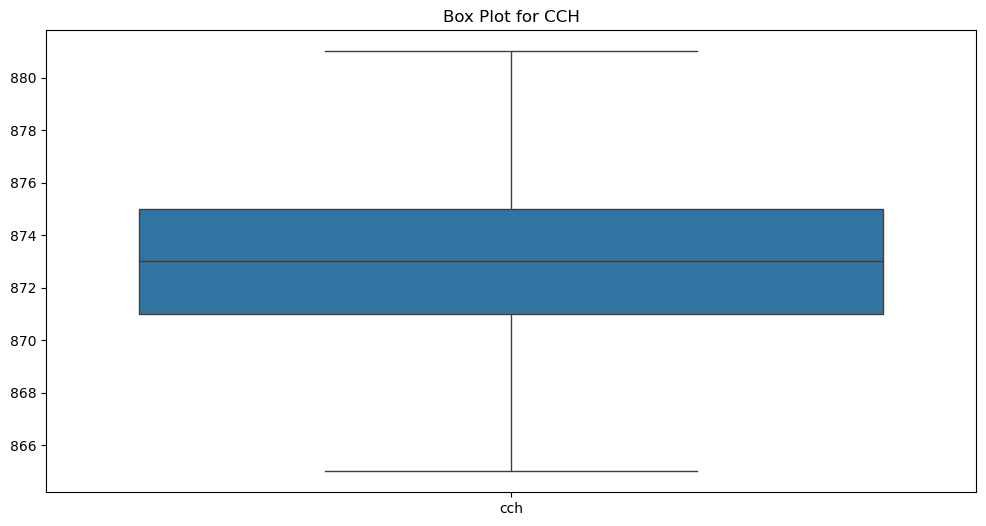

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[['cch']])
plt.title('Box Plot for CCH')
plt.show()

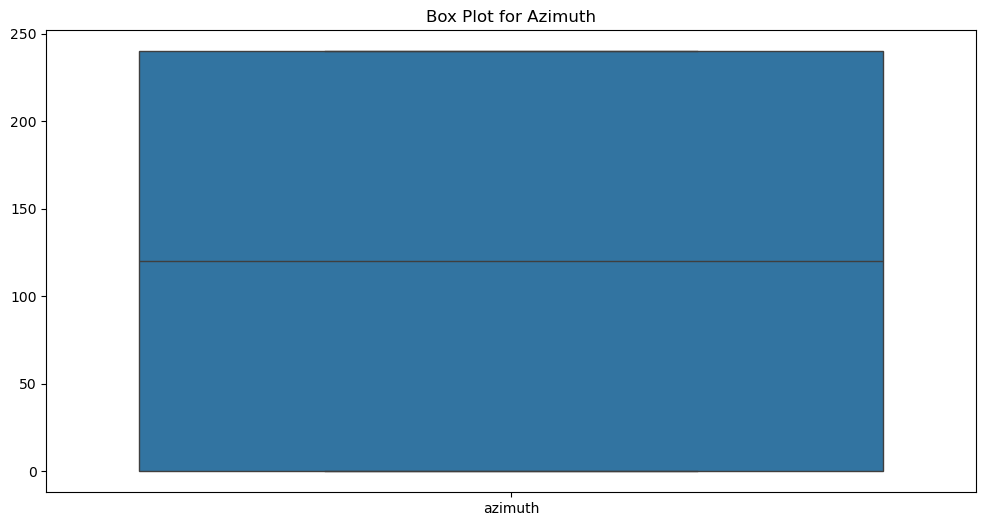

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[['azimuth']])
plt.title('Box Plot for Azimuth')
plt.show()

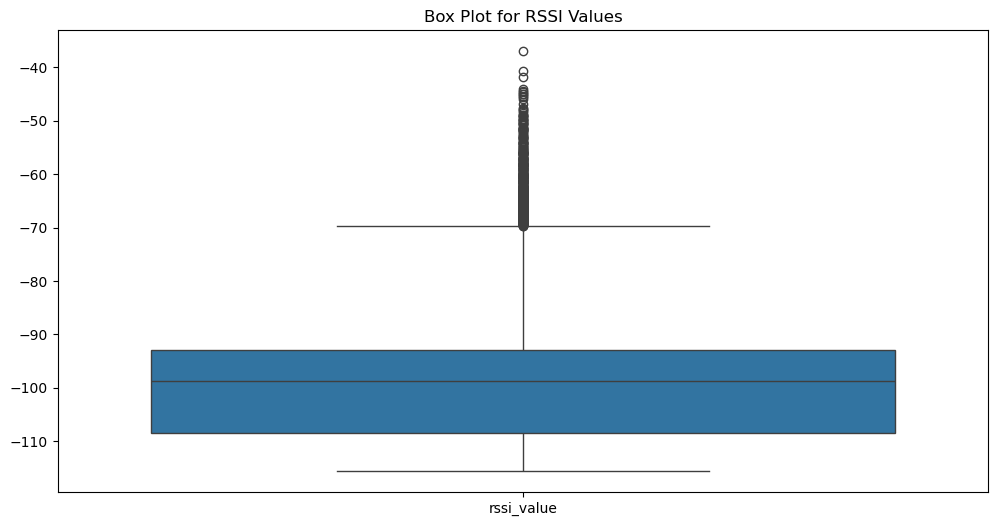

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df[['rssi_value']])
plt.title('Box Plot for RSSI Values')
plt.show()

Here outliers are visible

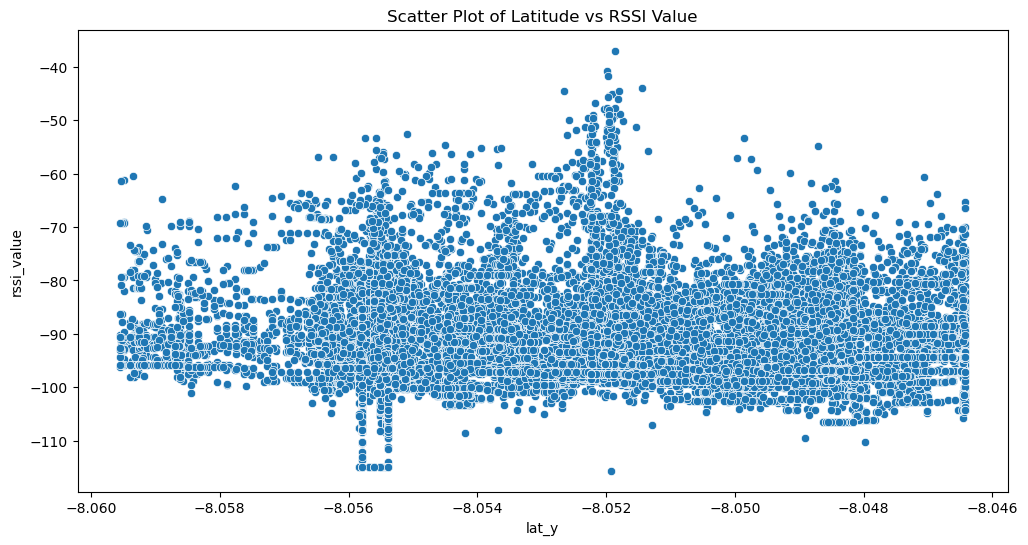

In [76]:
# Scatter plot to visualize relationship and outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lat_y', y='rssi_value', data=merged_df)
plt.title('Scatter Plot of Latitude vs RSSI Value')
plt.show()

This graph shows no simple liaer relationship between latitude and rssi value. Some outliers are present in rssi values of -110 and -40

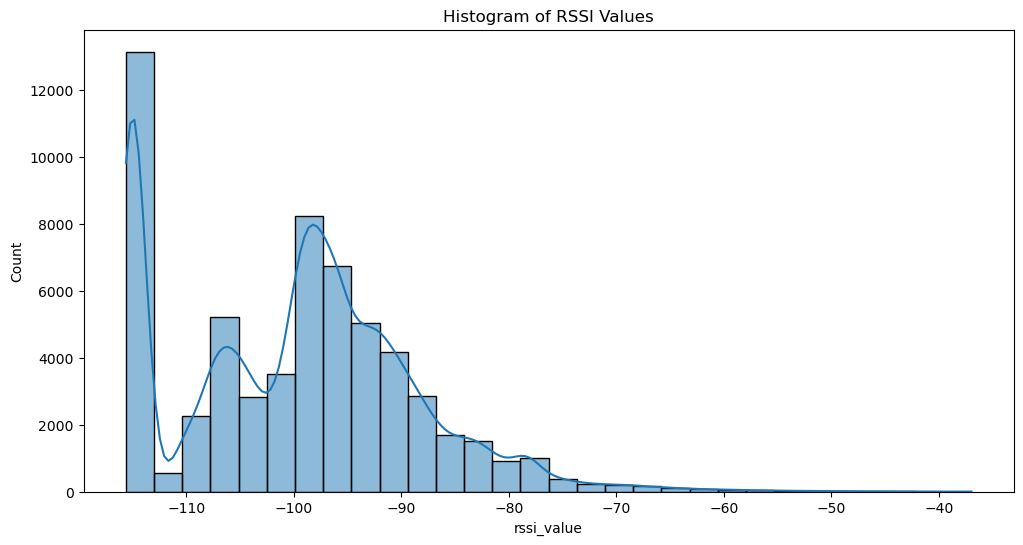

In [77]:
# Histogram to see the distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['rssi_value'], bins=30, kde=True)
plt.title('Histogram of RSSI Values')
plt.show()

In [78]:
merged_df['rssi_value'] = pd.to_numeric(merged_df['rssi_value'], errors='coerce')

# Identify outliers using IQR
Q1 = merged_df[['rssi_value']].quantile(0.25)
Q3 = merged_df[['rssi_value']].quantile(0.75)
IQR = Q3 - Q1

# Define a function to find outliers
def find_outliers(data, column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers


# Find outliers in lat_x, lat_y, lon_x, lon_y, and rssi_value
rssi_outliers = find_outliers(merged_df, 'rssi_value')

# Remove outliers
merged_df = merged_df[~merged_df['rssi_value'].isin(rssi_outliers['rssi_value'])]
merged_df

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60970,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60971,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60972,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60973,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_3_3,-115.000000


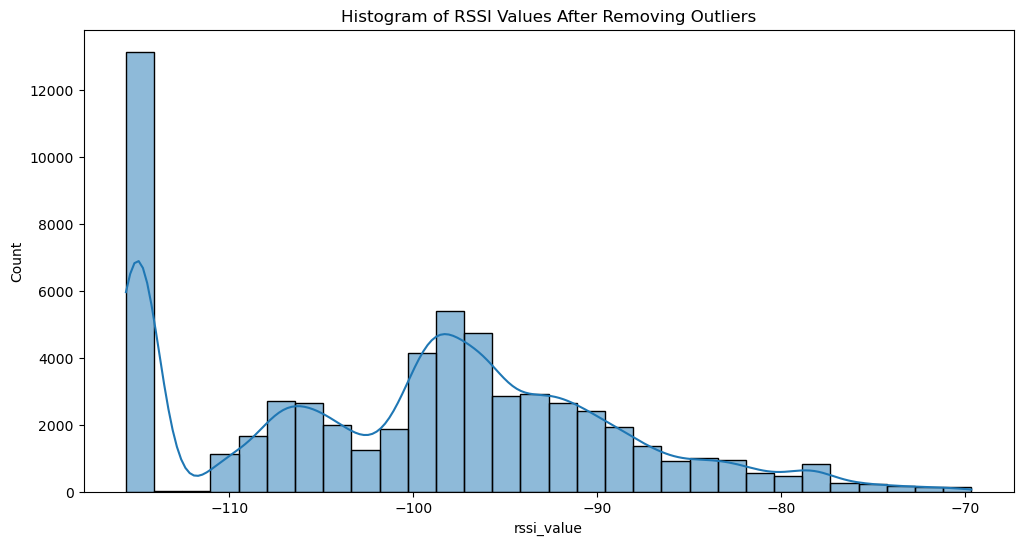

In [79]:
# Histogram to see the new distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['rssi_value'], bins=30, kde=True)
plt.title('Histogram of RSSI Values After Removing Outliers')
plt.show()

In [80]:
# save to csv
merged_df.to_csv('./data/data_train.csv', index=False)

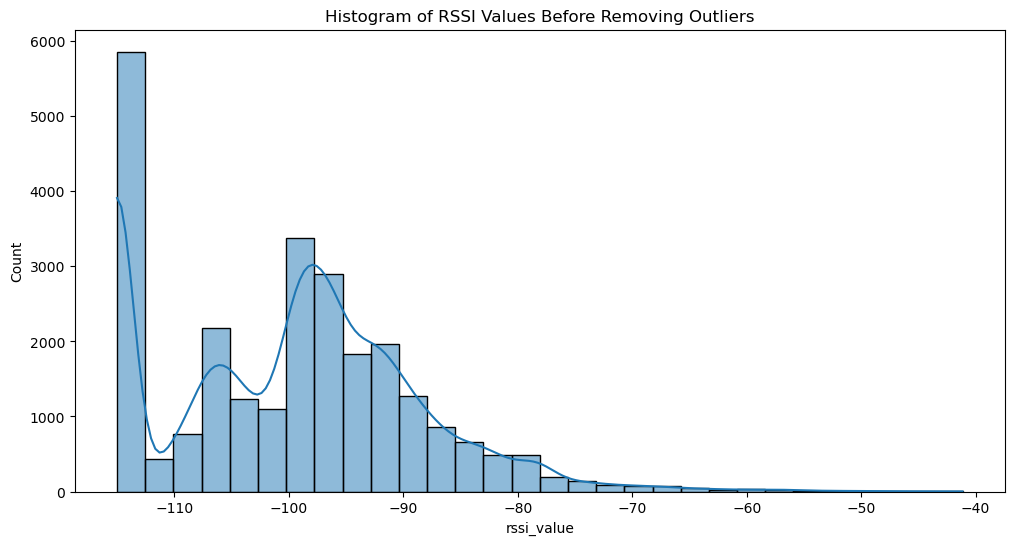

In [81]:
## same thing for test data

plt.figure(figsize=(12, 6))
sns.histplot(merged_df_test['rssi_value'], bins=30, kde=True)
plt.title('Histogram of RSSI Values Before Removing Outliers')
plt.show()

In [82]:
# Find outliers in lat_x, lat_y, lon_x, lon_y, and rssi_value
df_test = pd.read_csv('./data/data_test.csv')
rssi_outliers = find_outliers(df_test, 'rssi_value')

rssi_outliers

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
2548,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8487,3.0,3.0,3.0,rssi_1_1,-68.72
2784,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,9324,4.0,7.0,3.0,rssi_1_1,-68.95
2833,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,9470,2.0,5.0,4.0,rssi_1_1,-65.33
5758,1,BTS_1_2,PEMDL01_2,-8.04342,-34.9520,872,120,rssi_1_2,9542,1.0,3.0,5.0,rssi_1_2,-66.32
8530,1,BTS_1_3,PEMDL01_3,-8.04342,-34.9520,875,240,rssi_1_3,9113,2.0,4.0,3.0,rssi_1_3,-66.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25561,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,7768,5.0,6.0,1.0,rssi_3_3,-65.10
25566,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,7780,5.0,7.0,1.0,rssi_3_3,-63.08
25571,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,7797,5.0,7.0,1.0,rssi_3_3,-69.52
25609,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,7924,5.0,7.0,1.0,rssi_3_3,-69.41


In [83]:
## remove outliers
df_test = df_test[~df_test['rssi_value'].isin(rssi_outliers['rssi_value'])]
df_test

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,0,5.0,3.0,2.0,rssi_1_1,-115.0000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,3,5.0,3.0,2.0,rssi_1_1,-115.0000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8,5.0,3.0,2.0,rssi_1_1,-115.0000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,10,5.0,3.0,2.0,rssi_1_1,-115.0000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,12,5.0,3.0,2.0,rssi_1_1,-115.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9672,1.0,4.0,4.0,rssi_3_3,-97.2200
26132,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9674,1.0,4.0,4.0,rssi_3_3,-97.5000
26133,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9675,1.0,4.0,4.0,rssi_3_3,-96.3650
26134,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,9677,1.0,4.0,5.0,rssi_3_3,-94.3275


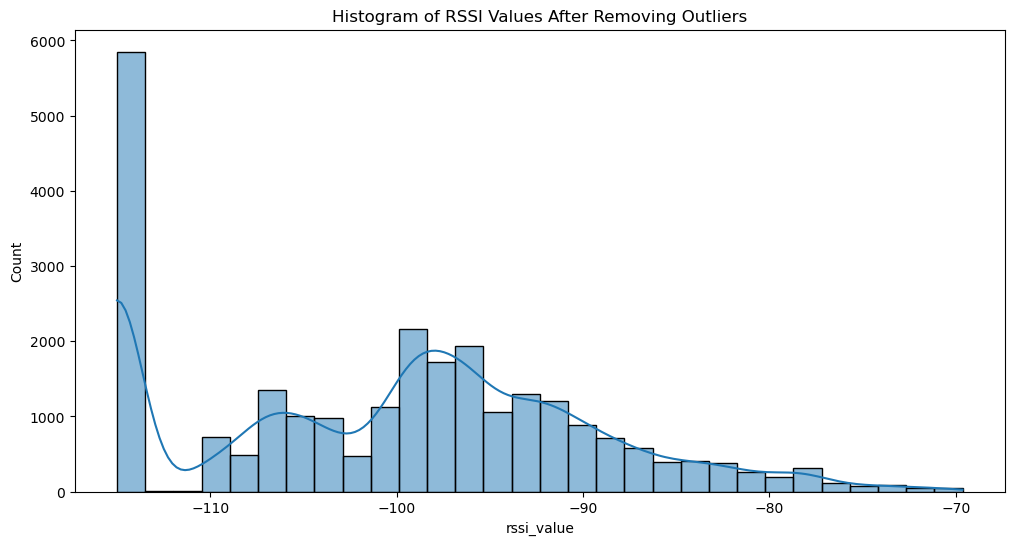

In [84]:
## see distribution of rssi values
plt.figure(figsize=(12, 6))
sns.histplot(df_test['rssi_value'], bins=30, kde=True)
plt.title('Histogram of RSSI Values After Removing Outliers')
plt.show()

In [85]:
### save to csv
df_test.to_csv('./data/data_test.csv', index=False)

Now train dataset and test dataset are cleaned

### Correlation between features

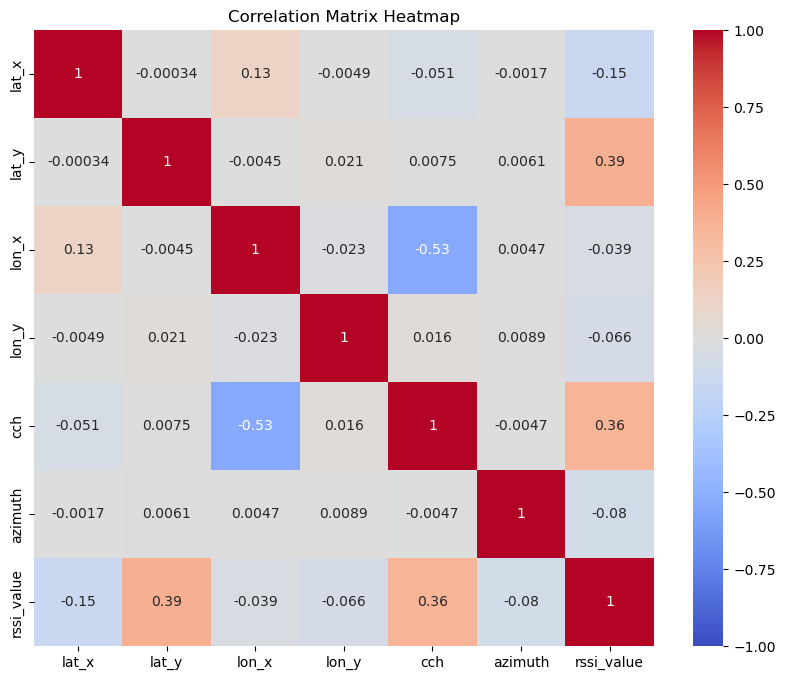

In [88]:
### see correlation between variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

merged_df = pd.read_csv('./data/data_train.csv')

# convert necessary columns to numeric types
merged_df['lat_x'] = pd.to_numeric(merged_df['lat_x'], errors='coerce')
merged_df['lat_y'] = pd.to_numeric(merged_df['lat_y'], errors='coerce')
merged_df['lon_x'] = pd.to_numeric(merged_df['lon_x'], errors='coerce')
merged_df['lon_y'] = pd.to_numeric(merged_df['lon_y'], errors='coerce')
merged_df['cch'] = pd.to_numeric(merged_df['cch'], errors='coerce')
merged_df['azimuth'] = pd.to_numeric(merged_df['azimuth'], errors='coerce')
merged_df['rssi_value'] = pd.to_numeric(merged_df['rssi_value'], errors='coerce')

# select relevant columns
relevant_columns = ['lat_x', 'lat_y', 'lon_x', 'lon_y', 'cch', 'azimuth', 'rssi_value']

# correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In this case, there's no feature to remove